In [53]:
import os
import sys
import json
from PIL import Image
from collections import defaultdict
from tqdm import tqdm

In [2]:
root = '/proj/vondrick4/naveen/coir-data'

In [3]:
os.listdir(root)

['FashionIQ', 'CIRR', 'CIRCO', 'annotations', 'LaSCo']

## LaSCo dataset

In [4]:
lasco_train = json.load(open(os.path.join(root, 'LaSCo', 'lasco_train.json'), 'r'))
lasco_val = json.load(open(os.path.join(root, 'LaSCo', 'lasco_val.json'), 'r'))

In [5]:
len(lasco_train)

359268

In [6]:
len(lasco_val)

30037

## LaSCo dataset

In [7]:
lasco_train_corpus = json.load(open(os.path.join(root, 'LaSCo', 'lasco_train_corpus.json'), 'r'))

In [8]:
len(lasco_train_corpus)

81652

In [9]:
lasco_train_corpus_image_ids = list(map(lambda x: int(x), list(set(lasco_train_corpus.keys()))))

In [10]:
len(lasco_train_corpus_image_ids)

81652

In [11]:
lasco_val_corpus = json.load(open(os.path.join(root, 'LaSCo', 'lasco_val_corpus.json'), 'r'))

In [12]:
len(lasco_val_corpus)

39826

In [13]:
lasco_val_corpus_image_ids = list(set(map(lambda x: x['id'], lasco_val_corpus)))

In [14]:
len(lasco_val_corpus_image_ids)

39826

## COCO 2014 Vision-Languge dataset

In [15]:
coco_train_2014 = json.load(open(os.path.join(root, 'annotations', 'captions_train2014.json'), 'r'))
coco_val_2014 = json.load(open(os.path.join(root, 'annotations', 'captions_val2014.json'), 'r'))

In [16]:
len(coco_train_2014)

4

In [17]:
len(coco_val_2014)

4

In [18]:
coco_train_2014.keys()

dict_keys(['info', 'images', 'licenses', 'annotations'])

In [19]:
coco_val_2014.keys()

dict_keys(['info', 'images', 'licenses', 'annotations'])

In [20]:
len(coco_train_2014['images'])

82783

In [21]:
len(coco_val_2014['images'])

40504

In [22]:
coco_train_2014_image_ids = list(set(map(lambda x: x['id'], coco_train_2014['images'])))
len(coco_train_2014_image_ids)

82783

In [23]:
coco_val_2014_image_ids = list(set(map(lambda x: x['id'], coco_val_2014['images'])))
len(coco_val_2014_image_ids)

40504

In [24]:
len(coco_train_2014['annotations'])

414113

In [25]:
len(coco_val_2014['annotations'])

202654

In [26]:
coco_train_2014['annotations'][0]

{'image_id': 318556,
 'id': 48,
 'caption': 'A very clean and well decorated empty bathroom'}

In [27]:
coco_val_2014['annotations'][0]

{'image_id': 203564,
 'id': 37,
 'caption': 'A bicycle replica with a clock as the front wheel.'}

In [28]:
coco_train_2014_dikt = defaultdict(list)
for sample in coco_train_2014['annotations']:
    coco_train_2014_dikt[sample['image_id']].append(sample['caption'])

In [29]:
coco_val_2014_dikt = defaultdict(list)
for sample in coco_val_2014['annotations']:
    coco_val_2014_dikt[sample['image_id']].append(sample['caption'])

## LaSCo - COCO checks

In [30]:
len(list(set(coco_train_2014_image_ids).intersection(set(lasco_train_corpus_image_ids))))

81652

In [31]:
len(list(set(coco_val_2014_image_ids).intersection(set(lasco_val_corpus_image_ids))))

39826

## COCO Image Caps data creation

In [45]:
#id_ = 0
train_images_and_caps = []

for image in tqdm(lasco_train_corpus_image_ids):
    for caption in coco_train_2014_dikt[image]:
        train_images_and_caps.append({
            'id': id_,
            'image-id': image,
            'caption': caption
        })
#id_ += 1

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 81652/81652 [00:00<00:00, 220998.43it/s]


In [46]:
len(train_images_and_caps)

408455

In [47]:
with open("/proj/vondrick4/naveen/coir-data/annotations/images_and_caps_train2014.json", "w") as f:
    json.dump(train_images_and_caps, f, indent=4)

In [48]:
id_ = 0
val_images_and_caps = []

for image in tqdm(lasco_val_corpus_image_ids):
    for caption in coco_val_2014_dikt[image]:
        val_images_and_caps.append({
            'id': id_,
            'image-id': image,
            'caption': caption
        })
        id_ += 1

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 39826/39826 [00:00<00:00, 241278.06it/s]


In [49]:
len(val_images_and_caps)

199262

In [50]:
with open("/proj/vondrick4/naveen/coir-data/annotations/images_and_caps_val2014.json", "w") as f:
    json.dump(val_images_and_caps, f, indent=4)

In [51]:
image = Image.open(os.path.join(root, 'LaSCo', 'coco', 'train2014', 'COCO_train2014_000000318556.jpg'))

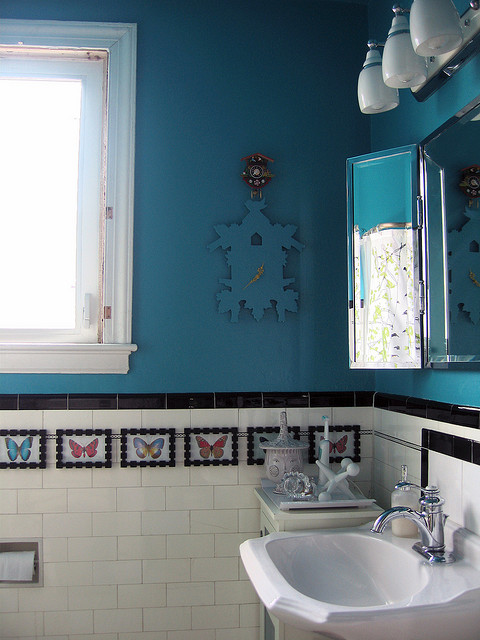

In [52]:
image

In [ ]:
cap_train = json.load(open(os.path.join('/local/vondrick/nd2794/CoIR', data_path, 'captions_train2014.json'), 'r'))
cap_val = json.load(open(os.path.join('/local/vondrick/nd2794/CoIR', data_path, 'captions_val2014.json'), 'r'))

In [ ]:
cap_train.keys()

In [ ]:
cap_val.keys()

In [ ]:
cap_train['info']

In [ ]:
cap_val['info']

In [ ]:
len(cap_train['images'])

In [ ]:
len(cap_val['images'])

In [ ]:
cap_train['images'][:1]

In [ ]:
cap_val['images'][:1]

In [ ]:
ids_and_image_name_val = dict(map(lambda x: (x['id'], x['file_name']), cap_val['images']))
ids_and_image_name_val

In [ ]:
ids_and_image_name_train = dict(map(lambda x: (x['id'], x['file_name']), cap_train['images']))
ids_and_image_name_train

In [ ]:
len(ids_and_image_name_val)

In [ ]:
len(ids_and_image_name_train)

In [ ]:
train_triplets = list(
    map(
        lambda x: dict(
            [
                ('image_id', x['image_id']), 
                ('image_name', ids_and_image_name_train[x['image_id']]), 
                ('caption', x['caption'])
            ]
        ), 
        cap_train['annotations']
    )
)

In [ ]:
val_triplets = list(
    map(
        lambda x: dict(
            [
                ('image_id', x['image_id']), 
                ('image_name', ids_and_image_name_val[x['image_id']]), 
                ('caption', x['caption'])
            ]
        ), 
        cap_val['annotations']
    )
)